# IMEC2001 Herramientas Computacionales 
## Clase 14 - Visualización 3D


## TABLA DE CONTENIDO

- 1.1. OpenSCAD: viewscad y SolidPython
- 1.2. Mallas STL
- 1.3. Archivos VTK y paraview

En esta clase se exploran la visualización tridimensional en python. 

## 1.1  OpenSCAD: viewscad y SolidPython

OpenSCAD es un software de modelado 3D de código abierto que se utiliza principalmente para crear modelos tridimensionales paramétricos. A diferencia de otras herramientas de modelado 3D que utilizan interfaces gráficas de usuario (GUI) para manipular objetos directamente, OpenSCAD utiliza un lenguaje de programación de scripts para describir los modelos en términos matemáticos y geométricos. 

Una vez que se ha escrito el script, OpenSCAD lo procesa y genera un modelo tridimensional que puede ser visualizado en su entorno de trabajo. Los usuarios pueden rotar, mover y hacer zoom en el modelo para revisarlo y realizar ajustes según sea necesario. Además, OpenSCAD permite exportar los modelos en formatos de archivo comunes como STL para su uso en impresoras 3D u otros programas de modelado 3D.

OpenSCAD se puede descargar de https://openscad.org/downloads.html. Es un softare standalone, sin embargo existen extensiones relacionadas en python que aprovechan mejor el programa. Las veremos en esta sección.

In [3]:
!pip install viewscad
!pip install solidpython
!pip install ipywidgets --update
!pip install numpy-stl


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --update



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from solid import cylinder, translate,scad_render
import viewscad
c = cylinder(r=10, h=5) + cylinder(r=2, h=30)
renderer=viewscad.Renderer()
renderer.render(c)

In [11]:
print(scad_render(c))



union() {
	cylinder(h = 5, r = 10);
	cylinder(h = 30, r = 2);
}


In [12]:
c = cylinder(r=10, h=5) - translate([1,5,0])(cylinder(r=2, h=30))
renderer.render(c)

## 1.2. Archivos STL

La geometría tridimensional puede ser discretizada para almacenar formas digitalmente. 

El formato STL (de sus siglas en inglés, *Stereolithography*) es un tipo de archivo utilizado principalmente para la impresión 3D. Este formato describe únicamente la superficie geométrica de un objeto tridimensional sin ninguna representación de color, textura o cualquier otro atributo común en modelos más complejos. La simplicidad del formato STL lo ha hecho muy popular en el campo de la fabricación aditiva y el modelado 3D.

### Estructura Básica

Un archivo STL puede estar en dos formatos: ASCII (texto plano) o binario. Ambos formatos describen las superficies del objeto mediante una serie de triángulos.

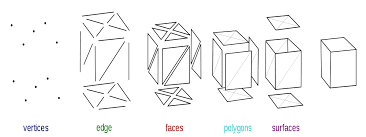

#### Formato ASCII

En el formato ASCII, un archivo STL se ve algo así:

```plaintext
solid nombre_del_objeto
    facet normal ni nj nk
        outer loop
            vertex v1x v1y v1z
            vertex v2x v2y v2z
            vertex v3x v3y v3z
        endloop
    endfacet
    ...
endsolid nombre_del_objeto
```

- `nombre_del_objeto` es opcional y no siempre se utiliza.
- Cada `facet` representa un triángulo definido por tres vértices (`vertex`).
- La `normal ni nj nk` define la orientación del triángulo en el espacio tridimensional, donde `(ni, nj, nk)` son las componentes x, y y z del vector normal al plano del triángulo.


Desde viewscad puede exportar archivos stl así:

In [ ]:
c = cylinder(r=10, h=5) - translate([1,1,0])(cylinder(r=2, h=30))
renderer.render(c, outfile='mi_objeto.stl')

In [ ]:
#Puede cargar un archivo stl en numpy usando la librería stl

In [ ]:
from stl import mesh  
modelo = mesh.Mesh.from_file('mi_objeto.stl')


In [ ]:
#Observe el contenido
modelo.vectors

Finalmente puede graficar usando herramientas de matplotlib

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
figura = plt.figure()
ax = figura.add_subplot(111, projection='3d')
ax.add_collection3d(mplot3d.art3d.Poly3DCollection(modelo.vectors))
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(-10,10)